In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) # display all columns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

# Setting Custom colors
my_colors = ["#ff6e54", "#ffa600", "#ff2e63", "#a3f7bf", "#9378ff", "#56e39f", "#ff67ab", "#5e2ca5", "#ffd166", "#00b4d8", "#4ecdc4", "#f8edeb"]
my_palette = sns.color_palette(my_colors) # Create a seaborn palette object
sns.set_palette(my_palette)  # Use the custom palette with a seaborn function
from matplotlib.colors import ListedColormap
colors = ['#ffc3a0', '#ffafcc', '#bde0fe', '#ffabab']
my_cmap = sns.color_palette(colors)
cmap = ListedColormap(colors)

import warnings
warnings.filterwarnings(action='ignore')
import catboost as cb

In [36]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
add_train = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

display(train.head(), test.head(), add_train.head())

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,Male,43,3,1,Laboratory Technician,3,Single,2318,17778,1,Y,No,12,3,4,80,0,1,2,2,1,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,Male,67,3,2,Sales Executive,1,Divorced,5486,12421,6,Y,Yes,12,3,3,80,1,7,3,3,2,2,2,2
2,1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,Male,41,3,1,Research Scientist,4,Divorced,2741,23577,4,Y,Yes,13,3,2,80,2,13,2,2,7,7,1,7
3,1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,Male,89,2,2,Healthcare Representative,3,Single,5228,20364,1,Y,No,13,3,3,80,0,14,2,2,14,10,11,8
4,1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,Male,79,3,1,Laboratory Technician,4,Single,1223,15178,1,Y,No,14,3,1,80,0,1,5,3,1,0,0,0


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [37]:
train.shape, test.shape, add_train.shape

((1677, 35), (1119, 34), (1470, 35))

In [38]:
train.columns = train.columns.str.replace(' ', '')
test.columns = test.columns.str.replace(' ', '')
add_train.columns = add_train.columns.str.replace(' ', '')

In [39]:
# encode attrition in add_train to numerical
from sklearn.preprocessing import LabelEncoder
add_train['Attrition'] = add_train['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [40]:
for i in [train, add_train]:
    print(i['Attrition'].value_counts())

Attrition
0    1477
1     200
Name: count, dtype: int64
Attrition
0    1233
1     237
Name: count, dtype: int64


In [41]:
# a_a = add_train[add_train['Attrition'] == 1].reset_index(drop=True)
train = pd.concat([train, add_train]).reset_index(drop=True)
train.tail()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,EmployeeNumber
3142,NaN,36,Travel_Frequently,884,Research & Development,23,2,Medical,1,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3,0,2061.0
3143,NaN,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7,0,2062.0
3144,NaN,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3,0,2064.0
3145,NaN,49,Travel_Frequently,1023,Sales,2,3,Medical,1,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8,0,2065.0
3146,NaN,34,Travel_Rarely,628,Research & Development,8,3,Medical,1,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2,0,2068.0


In [42]:
data = [train, test]
for i in data:
    print(i.info())
    print('-' *100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1677 non-null   float64
 1   Age                       3147 non-null   int64  
 2   BusinessTravel            3147 non-null   object 
 3   DailyRate                 3147 non-null   int64  
 4   Department                3147 non-null   object 
 5   DistanceFromHome          3147 non-null   int64  
 6   Education                 3147 non-null   int64  
 7   EducationField            3147 non-null   object 
 8   EmployeeCount             3147 non-null   int64  
 9   EnvironmentSatisfaction   3147 non-null   int64  
 10  Gender                    3147 non-null   object 
 11  HourlyRate                3147 non-null   int64  
 12  JobInvolvement            3147 non-null   int64  
 13  JobLevel                  3147 non-null   int64  
 14  JobRole 

In [43]:
print(train.duplicated().sum())
print(test.duplicated().sum())

0
0


In [44]:
print(train.columns.tolist());print()
print(test.columns.tolist())

['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition', 'EmployeeNumber']

['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', '

In [45]:
train = train.drop(['id', 'Over18','StandardHours', 'EmployeeCount', 'EmployeeNumber'], axis=1)
test = test.drop(['id', 'Over18','StandardHours', 'EmployeeCount'], axis=1)

In [46]:
for i in train.select_dtypes(exclude='number').columns:
    print(train[i].value_counts())
    print(100 * '-')

BusinessTravel
Travel_Rarely        2333
Travel_Frequently     538
Non-Travel            276
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Department
Research & Development    2128
Sales                      917
Human Resources            102
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
EducationField
Life Sciences       1381
Medical             1013
Marketing            311
Technical Degree     238
Other                164
Human Resources       40
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Gender
Male      1946
Female    1201
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
JobRole
Sales Executive              681
Research Scientist           636
Laboratory Technici

In [47]:
for i in test.select_dtypes(exclude='number').columns:
    print(test[i].value_counts())
    print(100 * '-')

BusinessTravel
Travel_Rarely        799
Travel_Frequently    212
Non-Travel           108
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Department
Research & Development    777
Sales                     306
Human Resources            36
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
EducationField
Life Sciences       519
Medical             345
Marketing           102
Technical Degree     96
Other                45
Human Resources      12
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Gender
Male      690
Female    429
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
JobRole
Sales Executive              240
Laboratory Technician        230
Research Scientist           230


## EDA

In [48]:
cat_col = train.select_dtypes('O').columns.to_list() + ['Attrition']
print(cat_col)

test_cat_col = cat_col[:-1]
print(test_cat_col)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Attrition']
['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


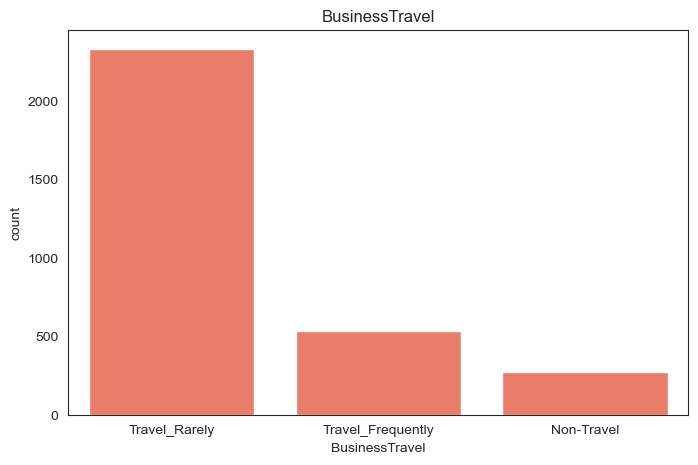

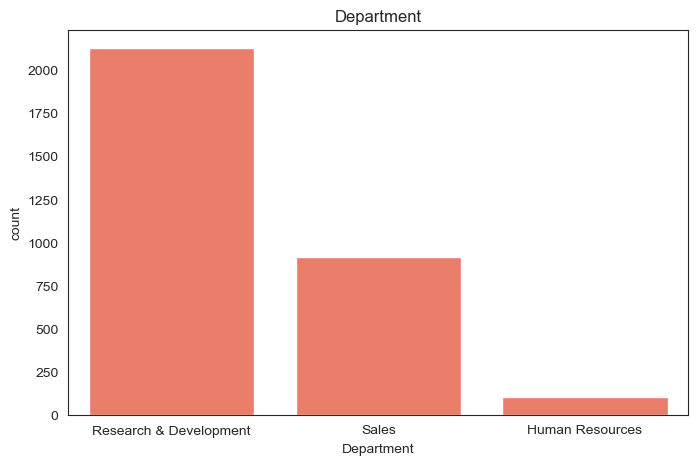

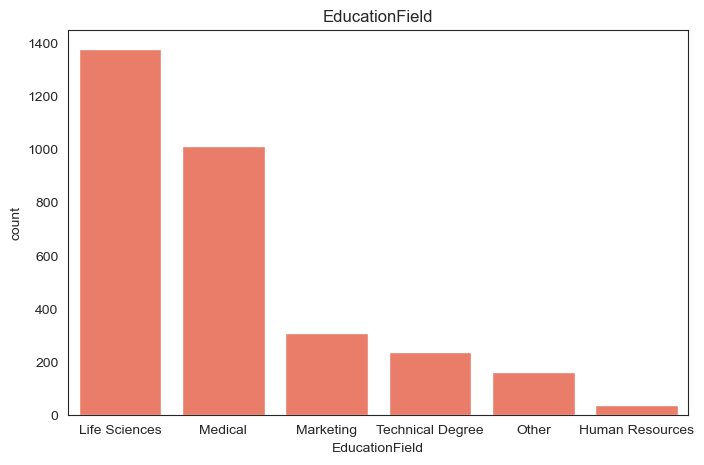

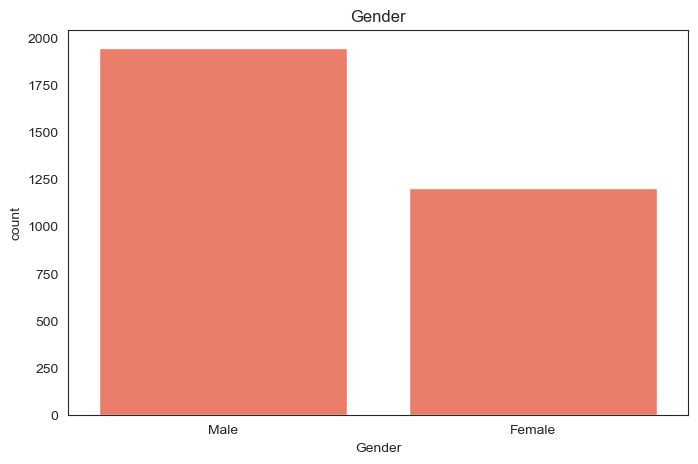

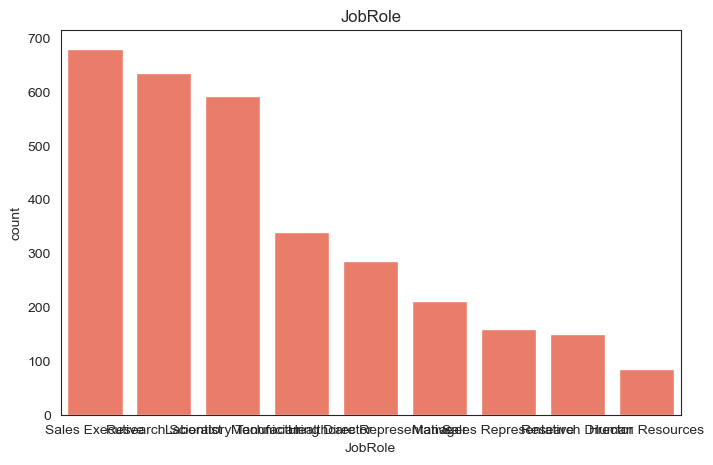

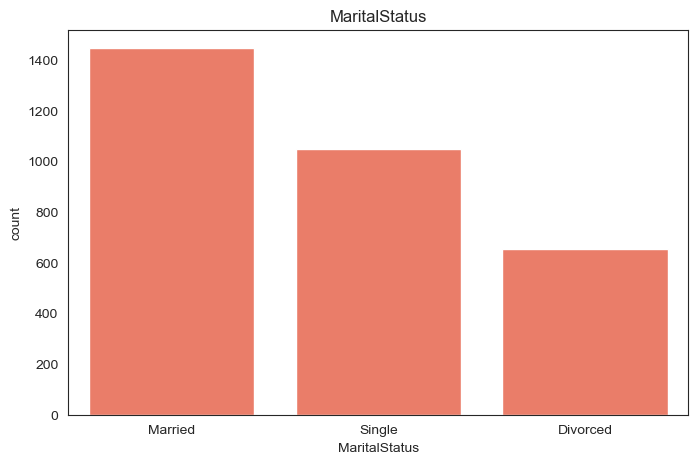

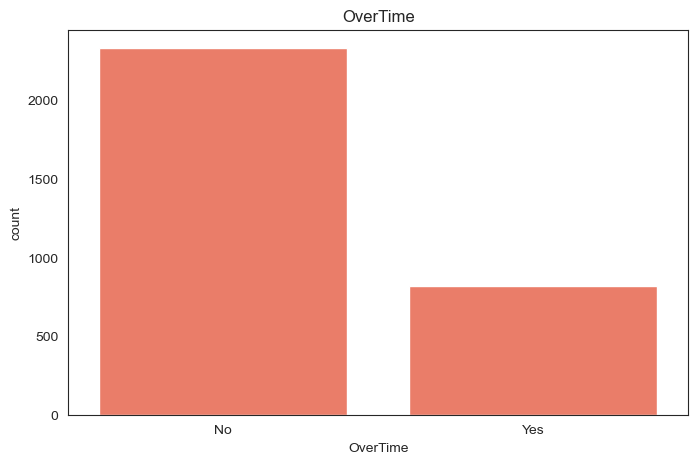

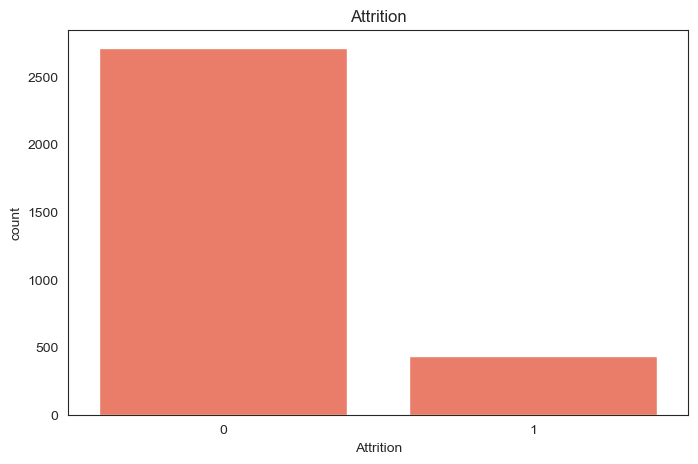

In [49]:
review = train[cat_col]
for i in review.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=review[i].value_counts().index, y=review[i].value_counts()).set_title(i)
    plt.show()

In [50]:
# for i in concatenated_train.select_dtypes(include='number').columns:
#     plt.figure(figsize=(8, 5))
#     sns.histplot(train[i])
#     plt.show();

In [51]:
# for i in concatenated_train.select_dtypes(include='number').columns:
#     plt.figure(figsize=(8, 5))
#     sns.boxplot(y=train[i])
#     plt.xlabel(i)
#     plt.show();

## Feature Engineering

Explanation of the columns in the dataset:

1. **id:** Unique identifier for each employee.

2. **Age:** The age of the employee.

3. **BusinessTravel:** The frequency of business travel. This could be "Non-Travel," "Travel_Rarely," or "Travel_Frequently."

4. **DailyRate:** The daily rate of pay for the employee.

5. **Department:** The department in which the employee works ('Research & Development', 'Sales', 'Human Resources').

6. **DistanceFromHome:** The distance of the employee's home from the workplace.

7. **Education:** The level of education achieved by the employee.

8. **EducationField:** The field of education of the employee ('Medical', 'Other', 'Marketing', 'Life Sciences', 'Technical Degree', 'Human Resources').

9. **EmployeeCount:** The count of employees. This column seems to have a constant value and may be dropped as it doesn't provide useful information.

10. **EnvironmentSatisfaction:** Employee's satisfaction with their work environment.

11. **Gender:** The gender of the employee.

12. **HourlyRate:** The hourly rate of pay for the employee.

13. **JobInvolvement:** The level of job involvement.

14. **JobLevel:** The level of the employee's job within the company hierarchy.

15. **JobRole:** The role/title of the employee ('Laboratory Technician', 'Sales Representative', 'Sales Executive',
       'Healthcare Representative', 'Manager', 'Manufacturing Director',
       'Research Scientist', 'Human Resources', 'Research Director').

16. **JobSatisfaction:** Employee's satisfaction with their job.

17. **MaritalStatus:** The marital status of the employee ('Married', 'Divorced', 'Single').

18. **MonthlyIncome:** The monthly income of the employee.

19. **MonthlyRate:** The monthly rate of pay for the employee.

20. **NumCompaniesWorked:** The number of companies the employee has worked for.

21. **Over18:** Indicates if the employee is over 18 years old. This column may be dropped if all values are the same.

22. **OverTime:** Whether the employee works overtime or not.

23. **PercentSalaryHike:** The percentage increase in salary.

24. **PerformanceRating:** The performance rating of the employee.

25. **RelationshipSatisfaction:** Employee's satisfaction with their relationships at work.

26. **StandardHours:** The standard number of working hours.

27. **StockOptionLevel:** The level of stock options granted to the employee.

28. **TotalWorkingYears:** The total number of years the employee has been working.

29. **TrainingTimesLastYear:** The number of training times the employee attended last year.

30. **WorkLifeBalance:** Employee's perception of work-life balance.

31. **YearsAtCompany:** The number of years the employee has spent at the current company.

32. **YearsInCurrentRole:** The number of years the employee has been in the current role.

33. **YearsSinceLastPromotion:** The number of years since the last promotion.

34. **YearsWithCurrManager:** The number of years the employee has been with the current manager.

35. **Attrition:** The target variable indicating whether the employee has attrited (left the company) or not "Yes" or "No."

In [52]:
train.select_dtypes(include=['int64', 'float']).columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

In [53]:
for i in train.select_dtypes(exclude='number').columns:
    print(train[i].value_counts())
    print('-' * 50)

print();print();print()
for i in train.select_dtypes(include='number').columns:
    print(train[i].value_counts())
    print('-' * 50)

BusinessTravel
Travel_Rarely        2333
Travel_Frequently     538
Non-Travel            276
Name: count, dtype: int64
--------------------------------------------------
Department
Research & Development    2128
Sales                      917
Human Resources            102
Name: count, dtype: int64
--------------------------------------------------
EducationField
Life Sciences       1381
Medical             1013
Marketing            311
Technical Degree     238
Other                164
Human Resources       40
Name: count, dtype: int64
--------------------------------------------------
Gender
Male      1946
Female    1201
Name: count, dtype: int64
--------------------------------------------------
JobRole
Sales Executive              681
Research Scientist           636
Laboratory Technician        593
Manufacturing Director       341
Healthcare Representative    286
Manager                      213
Sales Representative         160
Research Director            151
Human Resources      

In [54]:
# Processing 'train' data
train_df = train.copy()

train_df['IncomePerAge'] = train_df['MonthlyIncome'] / train_df['Age']
train_df["AgeRisk"] = (train_df["Age"] < 34).astype(int)
train_df["HourlyRateRisk"] = (train_df["HourlyRate"] < 60).astype(int)
train_df["DistanceRisk"] = (train_df["DistanceFromHome"] >= 20).astype(int)
train_df["ShortCompanyTenure"] = (train_df["YearsAtCompany"] < 4).astype(int)
train_df['NumCompaniesAdjusted'] = train_df['NumCompaniesWorked'].replace(0, 1)
train_df['AverageCompanyTenure'] = train_df["TotalWorkingYears"] / train_df["NumCompaniesAdjusted"]
train_df['JobHopperIndicator'] = ((train_df["NumCompaniesAdjusted"] > 2) & (train_df["AverageCompanyTenure"] < 2.0)).astype(int)
train_df["AttritionRiskScore"] = train_df["AgeRisk"] + train_df["HourlyRateRisk"] + train_df["DistanceRisk"] + train_df["ShortCompanyTenure"] + train_df['JobHopperIndicator']
train_df['IncomeToDailyRateRatio'] = train_df['MonthlyIncome'] / train_df['DailyRate']
train_df['TenureToAgeRatio'] = train_df['TotalWorkingYears'] / train_df['Age']
train_df['TotalSatisfaction'] = train_df['EnvironmentSatisfaction'] + train_df['JobSatisfaction'] + train_df['RelationshipSatisfaction']

train_df.loc[train_df['Education'] == 15, 'Education'] = 5  
train_df.loc[train_df['JobLevel'] == 7, 'JobLevel'] = 5  

In [55]:
# Processing 'test' data
test_df = test.copy()

test_df['IncomePerAge'] = test_df['MonthlyIncome'] / test_df['Age']
test_df["AgeRisk"] = (test_df["Age"] < 34).astype(int)
test_df["HourlyRateRisk"] = (test_df["HourlyRate"] < 60).astype(int)
test_df["DistanceRisk"] = (test_df["DistanceFromHome"] >= 20).astype(int)
test_df["ShortCompanyTenure"] = (test_df["YearsAtCompany"] < 4).astype(int)
test_df['NumCompaniesAdjusted'] = test_df['NumCompaniesWorked'].replace(0, 1)
test_df['AverageCompanyTenure'] = test_df["TotalWorkingYears"] / test_df["NumCompaniesAdjusted"]
test_df['JobHopperIndicator'] = ((test_df["NumCompaniesAdjusted"] > 2) & (test_df["AverageCompanyTenure"] < 2.0)).astype(int)
test_df["AttritionRiskScore"] = test_df["AgeRisk"] + test_df["HourlyRateRisk"] + test_df["DistanceRisk"] + test_df["ShortCompanyTenure"] + test_df['JobHopperIndicator']
test_df['IncomeToDailyRateRatio'] = test_df['MonthlyIncome'] / test_df['DailyRate']
test_df['TenureToAgeRatio'] = test_df['TotalWorkingYears'] / test_df['Age']
test_df['TotalSatisfaction'] = test_df['EnvironmentSatisfaction'] + test_df['JobSatisfaction'] + test_df['RelationshipSatisfaction']

test_df.loc[test_df['Education'] == 15, 'Education'] = 5  
test_df.loc[test_df['JobLevel'] == 7, 'JobLevel'] = 5  

In [56]:
train_df.shape, test_df.shape

((3147, 43), (1119, 42))

In [57]:
cat_col = train_df.select_dtypes('O').columns.to_list() + ['Attrition']
cat_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime',
 'Attrition']

In [59]:
test_cat_col = cat_col[:-1]
test_cat_col

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [60]:
from sklearn.preprocessing import TargetEncoder

lb =TargetEncoder(smooth="auto")
lb

TargetEncoder()

In [61]:
lb.fit(train_df[cat_col].drop('Attrition', axis=1), train_df[cat_col]['Attrition'])

TargetEncoder()

In [62]:
te_train = pd.DataFrame(lb.transform(train_df[cat_col].drop('Attrition', axis=1)), columns=cat_col[:-1])
te_test = pd.DataFrame(lb.transform(test_df[test_cat_col]), columns=test_cat_col)

In [63]:
display(te_train.head(), te_test.head())

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0.222822,0.121718,0.124396,0.147991,0.207261,0.106518,0.263233
1,0.128594,0.173346,0.103825,0.147991,0.365987,0.106518,0.095252
2,0.128594,0.173346,0.195900,0.147991,0.139500,0.074980,0.095252
3,0.128594,0.121718,0.124396,0.124074,0.066565,0.106518,0.095252
4,0.128594,0.121718,0.124396,0.124074,0.065904,0.223379,0.263233


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,0.061729,0.121718,0.124396,0.147991,0.207261,0.223379,0.095252
1,0.128594,0.173346,0.195900,0.147991,0.139500,0.074980,0.263233
2,0.128594,0.121718,0.128175,0.147991,0.139935,0.074980,0.263233
3,0.128594,0.121718,0.128175,0.147991,0.066565,0.223379,0.095252
4,0.222822,0.121718,0.128175,0.147991,0.207261,0.223379,0.095252


In [64]:
train_df = train_df.select_dtypes(exclude='O')
test_df = test_df.select_dtypes(exclude='O')

In [66]:
train_df = pd.concat([train_df, te_train], axis=1)
test_df = pd.concat([test_df, te_test], axis=1)

In [67]:
display(train_df.head(), test_df.head())

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,IncomePerAge,AgeRisk,HourlyRateRisk,DistanceRisk,ShortCompanyTenure,NumCompaniesAdjusted,AverageCompanyTenure,JobHopperIndicator,AttritionRiskScore,IncomeToDailyRateRatio,TenureToAgeRatio,TotalSatisfaction,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,36,599,24,3,4,42,3,1,4,2596,5099,1,13,3,2,1,10,2,3,10,0,7,8,0,72.111111,0,1,1,0,1,10.0,0,2,4.333890,0.277778,10,0.222822,0.121718,0.124396,0.147991,0.207261,0.106518,0.263233
1,35,921,8,3,1,46,3,1,1,2899,10778,1,17,3,4,1,4,3,3,4,2,0,3,0,82.828571,0,1,0,0,1,4.0,0,1,3.147666,0.114286,6,0.128594,0.173346,0.103825,0.147991,0.365987,0.106518,0.095252
2,32,718,26,3,3,80,3,2,4,4627,16495,0,17,3,4,2,4,3,3,3,2,1,2,0,144.593750,1,0,1,1,1,4.0,0,3,6.444290,0.125000,11,0.128594,0.173346,0.195900,0.147991,0.139500,0.074980,0.095252
3,38,1488,2,3,3,40,3,2,1,5347,13384,3,14,3,3,0,15,1,1,6,0,0,2,0,140.710526,0,1,0,0,3,5.0,0,1,3.593414,0.394737,7,0.128594,0.121718,0.124396,0.124074,0.066565,0.106518,0.095252
4,50,1017,5,4,2,37,3,5,1,19033,19805,1,13,3,3,0,31,0,3,31,14,4,10,1,380.660000,0,1,0,0,1,31.0,0,1,18.714848,0.620000,6,0.128594,0.121718,0.124396,0.124074,0.065904,0.223379,0.263233


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomePerAge,AgeRisk,HourlyRateRisk,DistanceRisk,ShortCompanyTenure,NumCompaniesAdjusted,AverageCompanyTenure,JobHopperIndicator,AttritionRiskScore,IncomeToDailyRateRatio,TenureToAgeRatio,TotalSatisfaction,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,19,992,1,1,4,43,3,1,3,2318,17778,1,12,3,4,0,1,2,2,1,0,0,0,122.000000,1,1,0,1,1,1.000000,0,3,2.336694,0.052632,11,0.061729,0.121718,0.124396,0.147991,0.207261,0.223379,0.095252
1,45,1136,4,4,3,67,3,2,1,5486,12421,6,12,3,3,1,7,3,3,2,2,2,2,121.911111,0,0,0,1,6,1.166667,1,2,4.829225,0.155556,7,0.128594,0.173346,0.195900,0.147991,0.139500,0.074980,0.263233
2,37,155,13,3,4,41,3,1,4,2741,23577,4,13,3,2,2,13,2,2,7,7,1,7,74.081081,0,1,0,0,4,3.250000,0,1,17.683871,0.351351,10,0.128594,0.121718,0.128175,0.147991,0.139935,0.074980,0.263233
3,32,688,1,4,3,89,2,2,3,5228,20364,1,13,3,3,0,14,2,2,14,10,11,8,163.375000,1,0,0,0,1,14.000000,0,1,7.598837,0.437500,9,0.128594,0.121718,0.128175,0.147991,0.066565,0.223379,0.095252
4,29,464,9,1,3,79,3,1,4,1223,15178,1,14,3,1,0,1,5,3,1,0,0,0,42.172414,1,0,0,1,1,1.000000,0,2,2.635776,0.034483,8,0.222822,0.121718,0.128175,0.147991,0.207261,0.223379,0.095252


## Model Training

### XGBoost

In [69]:
import xgboost as xgb
import random
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [70]:
train_df.shape, test_df.shape

((3147, 43), (1119, 42))

In [71]:
X = train_df.drop(['Attrition'], axis=1)
y = train_df['Attrition']

In [72]:
from sklearn.model_selection import StratifiedKFold
from hyperopt import fmin, tpe, hp, STATUS_OK
import random

# Define the search space for Hyperopt
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 1050, 50),
    'max_depth': hp.uniform('max_depth', 2, 11),
    'learning_rate': hp.uniform('learning_rate', 0.001, 0.1),
    'subsample': hp.uniform('subsample', 0.25, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.25, 1),
    # 'gamma': hp.uniform('gamma', 0, 5),
    'min_child_weight': hp.quniform('min_child_weight', 5, 10, 1),
    # 'alpha': hp.uniform('alpha', 0, 5),
    # 'lambda': hp.uniform('lambda', 0, 5),
    'scale_pos_weight': hp.uniform('scale_pos_weight', 0, 10)
}

# Objective function
def objective(params):
    params.update({key: int(value) if key in ('n_estimators', 'max_depth', 'min_child_weight') else value for key, value in params.items()})

    skf_seed = random.randint(0, 2023)
    skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=skf_seed)

    xgb_model = xgb.XGBClassifier(**params, objective='binary:logistic', eval_metric='auc', random_state=skf_seed)

    auc_scores = [roc_auc_score(y.iloc[test_index], xgb_model.fit(X.iloc[train_index], y.iloc[train_index],
                                                                  eval_set=[(X.iloc[test_index], y.iloc[test_index])],
                                                                  verbose=False).predict_proba(X.iloc[test_index])[:, 1])
                  for train_index, test_index in skf.split(X, y)]

    mean_auc = np.mean(auc_scores)
    loss = 1 - mean_auc

    return {'loss': loss, 'status': STATUS_OK, 'params': params}

# Hyperparameter optimization
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100)

# Extract the best parameters
best_params = {key: int(value) if key in ('n_estimators', 'max_depth', 'min_child_weight') else value for key, value 
               in best.items() if key not in ('loss', 'status')}

# Initialize XGBoost classifier with best parameters
xgb_model = xgb.XGBClassifier(**best_params, objective='binary:logistic', eval_metric='auc', random_state=20181224)

# Train and predict using StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=20181224)
roc_val = [roc_auc_score(y_val_fold, xgb_model.fit(train_fold, y_fold, eval_set=[(val_fold, y_val_fold)], verbose=False)
                          .predict_proba(val_fold)[:, 1])
           for (train_index, test_index), (train_fold, val_fold, y_fold, y_val_fold) in
           zip(skf.split(X, y), [(X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]) for
                                 train_index, test_index in skf.split(X, y)])]

roc_train = [roc_auc_score(y_fold, xgb_model.fit(train_fold, y_fold, eval_set=[(val_fold, y_val_fold)], verbose=False)
                             .predict_proba(train_fold)[:, 1])
             for (train_index, test_index), (train_fold, val_fold, y_fold, y_val_fold) in
             zip(skf.split(X, y), [(X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]) for
                                   train_index, test_index in skf.split(X, y)])]

# Store predictions on the testing dataset test_df
predictions_df = pd.DataFrame()

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    train_fold, val_fold = X.iloc[train_index], X.iloc[test_index]
    y_fold, y_val_fold = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    xgb_model.fit(train_fold, y_fold, eval_set=[(val_fold, y_val_fold)], verbose=False)

    # Make predictions on the testing dataset
    predictions_df[i] = xgb_model.predict_proba(test_df)[:, 1]

# Print the results
print("roc_val:", roc_val)
print("Mean roc_val:", np.mean(roc_val))
print("\nroc_train:", roc_train)
print("Mean roc_train:", np.mean(roc_train))
print("\nBest Parameters:", best_params)

100%|█████████████████████████████████████████████| 100/100 [24:21<00:00, 14.61s/trial, best loss: 0.14226603073435762]
roc_val: [0.9103488762160349, 0.8513921502851391, 0.8155820194565583, 0.8700939282120094, 0.852230795035223, 0.9012915129151291, 0.7941127138544113, 0.9396721874195487, 0.8065734145713549, 0.8193598215051919]
Mean roc_val: 0.8560657419470601

roc_train: [0.9167326533316223, 0.921062213166661, 0.9222525813044389, 0.9220574902950048, 0.9207022859032663, 0.9184780397422294, 0.9254700180589592, 0.9163570823525493, 0.9232095620448592, 0.9223677008343688]
Mean roc_train: 0.920868962703396

Best Parameters: {'colsample_bytree': 0.5780336742803586, 'learning_rate': 0.014652380816445178, 'max_depth': 2, 'min_child_weight': 9, 'n_estimators': 1000, 'scale_pos_weight': 2.6035130481437543, 'subsample': 0.4968083025813558}


In [115]:
# predefined values for params
xgb_params = {'n_estimators': 150,
              'max_depth': 3,
              'learning_rate': 0.1,
              'min_child_weight': 4,
              'subsample': 0.7,
              'colsample_bytree': 0.3,
              # 'alpha': 0.5,
              'scale_pos_weight': 2.6
             }

random.seed(20181224)
# Initialize XGBoost classifier with best parameters
skf_seed = random.randint(0, 2023)
xgb_model = xgb.XGBClassifier(**xgb_params, objective='binary:logistic', eval_metric='auc', random_state=skf_seed)

# Train and predict using StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=skf_seed)
roc_val = [roc_auc_score(y_val_fold, xgb_model.fit(train_fold, y_fold, eval_set=[(val_fold, y_val_fold)], verbose=False)
                          .predict_proba(val_fold)[:, 1])
           for (train_index, test_index), (train_fold, val_fold, y_fold, y_val_fold) in
           zip(skf.split(X, y), [(X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]) for
                                 train_index, test_index in skf.split(X, y)])]

roc_train = [roc_auc_score(y_fold, xgb_model.fit(train_fold, y_fold, eval_set=[(val_fold, y_val_fold)], verbose=False)
                             .predict_proba(train_fold)[:, 1])
             for (train_index, test_index), (train_fold, val_fold, y_fold, y_val_fold) in
             zip(skf.split(X, y), [(X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]) for
                                   train_index, test_index in skf.split(X, y)])]

# Store predictions on the testing dataset test_df
predictions_df = pd.DataFrame()

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    train_fold, val_fold = X.iloc[train_index], X.iloc[test_index]
    y_fold, y_val_fold = y.iloc[train_index], y.iloc[test_index]

    # Fit the model on the training data
    xgb_model.fit(train_fold, y_fold, eval_set=[(val_fold, y_val_fold)], verbose=False)

    # Make predictions on the testing dataset
    predictions_df[i] = xgb_model.predict_proba(test_df)[:, 1]

# Print the results
print("roc_val:", roc_val)
print("Mean roc_val:", np.mean(roc_val))
print("\nroc_train:", roc_train)
print("Mean roc_train:", np.mean(roc_train))

roc_val: [0.8471150620597115, 0.8336967460583696, 0.8839315665883931, 0.8417477356591747, 0.90280107346528, 0.8237168735323717, 0.9007044615900704, 0.806230155324809, 0.8337767098601219, 0.8093194885437226]
Mean roc_val: 0.8483039872682024

roc_train: [0.9650807958461263, 0.9619009167190908, 0.9620042001946737, 0.9611090767396224, 0.9587565086846797, 0.9630140830670393, 0.9587585952195401, 0.9598091920005495, 0.9613128872405476, 0.9630975497572235]
Mean roc_train: 0.9614843805469093


In [107]:
# make submissions

test_ = pd.read_csv('test.csv')
predictions_xgb=predictions_df.min(axis=1)
sub=pd.DataFrame({"id":test_["id"],"Attrition":predictions_xgb}).set_index("id")
sub.to_csv("sub.csv")

In [45]:
xgb_params = {'n_estimators': 150,
                 'max_depth': 3,
                 'learning_rate': 0.1,
                 'min_child_weight': 4,
                 'subsample': 0.7,
                 'colsample_bytree': 0.3
             }


In [88]:
print(np.mean(roc_val))
print(np.mean(roc_train))

0.8487989827044148
0.9473274120439632
